<a href="https://colab.research.google.com/github/Amitarajak/crop_management_system/blob/main/tomato_disease_leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas


In [ ]:
od.download("https://www.kaggle.com/datasets/farukalam/tomato-leaf-diseases-detection-computer-vision/data",force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amitarajak
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/farukalam/tomato-leaf-diseases-detection-computer-vision


100%|██████████| 23.9M/23.9M [00:02<00:00, 9.62MB/s]


In [ ]:
import os
import shutil

# Define the path to the dataset directory
dataset_dir = '/content/tomato-leaf-diseases-detection-computer-vision'

# Define the folders to remove from
folders_to_remove = ['test', 'train', 'valid']

# Loop through each folder and remove the 'labels' folder
for folder_name in folders_to_remove:
    folder_path = os.path.join(dataset_dir, folder_name)
    labels_folder_path = os.path.join(folder_path, 'labels')

    if os.path.exists(labels_folder_path):
        shutil.rmtree(labels_folder_path)
        print(f"Removed 'labels' folder from {folder_name} dataset.")
    else:
        print(f"'labels' folder not found in {folder_name} dataset.")

print("Data preprocessing completed successfully.")


Removed 'labels' folder from test dataset.
Removed 'labels' folder from train dataset.
Removed 'labels' folder from valid dataset.
Data preprocessing completed successfully.


In [ ]:
od.download("https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amitarajak
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


100%|██████████| 179M/179M [00:10<00:00, 17.8MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/paulrosero/tomato-leaf-illness-detection",force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: amitarajak
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/paulrosero/tomato-leaf-illness-detection


100%|██████████| 22.2M/22.2M [00:02<00:00, 8.96MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import warnings
from tqdm import tqdm
from skimage.transform import resize
from skimage.io import imread
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/tomato-leaf-diseases-detection-computer-vision'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/tomato-leaf-diseases-detection-computer-vision/data.yaml
/content/tomato-leaf-diseases-detection-computer-vision/README.roboflow.txt
/content/tomato-leaf-diseases-detection-computer-vision/README.dataset.txt
/content/tomato-leaf-diseases-detection-computer-vision/valid/images/IMG_0364_JPG.rf.969269cf51f71efda5d59828d716f7b1.jpg
/content/tomato-leaf-diseases-detection-computer-vision/valid/images/IMG_1072_JPG.rf.9e3ea1c8934854811d2480958b2667f6.jpg
/content/tomato-leaf-diseases-detection-computer-vision/valid/images/IMG_0348_JPG.rf.224036500acd87dc9766c6be084e67a5.jpg
/content/tomato-leaf-diseases-detection-computer-vision/valid/images/IMG_0255_JPG.rf.140cd477c07a7f6fcdb21209f97cf11c.jpg
/content/tomato-leaf-diseases-detection-computer-vision/valid/images/IMG_0265_JPG.rf.72c7a148143a2bead15625112da81eb6.jpg
/content/tomato-leaf-diseases-detection-computer-vision/valid/images/IMG_0369_JPG.rf.a2f219937fcefabd19611c93f0885a96.jpg
/content/tomato-leaf-diseases-detection-computer-vi

In [ ]:
len(os.listdir("/content/tomato-leaf-diseases-detection-computer-vision/train/images"))

645

In [ ]:
len(os.listdir("/content/tomato-leaf-diseases-detection-computer-vision/valid/images"))

61

In [ ]:
len(os.listdir("/content/tomato-leaf-diseases-detection-computer-vision/test/images"))

31

In [ ]:
import os
import shutil

valid_dir = "/content/tomato-leaf-diseases-detection-computer-vision/valid/images"
train_dir = "/content/tomato-leaf-diseases-detection-computer-vision/train/images"
test_dir = "/content/tomato-leaf-diseases-detection-computer-vision/test/images"

# List files in the valid directory
valid_files = os.listdir(valid_dir)



# Determine the number of images to move to train and test folders
train_count = 31
test_count = 30

# Move images to train folder
for i in range(train_count):
    file_to_move = valid_files[i]
    source_path = os.path.join(valid_dir, file_to_move)
    destination_path = os.path.join(train_dir, file_to_move)
    shutil.move(source_path, destination_path)

# Move images to test folder
for i in range(train_count, train_count + test_count):
    file_to_move = valid_files[i]
    source_path = os.path.join(valid_dir, file_to_move)
    destination_path = os.path.join(test_dir, file_to_move)
    shutil.move(source_path, destination_path)


shutil.rmtree("/content/tomato-leaf-diseases-detection-computer-vision/valid")


print("Images moved to train and test folders. Valid folder dropped.")


Images moved to train and test folders. Valid folder dropped.


In [ ]:
len(os.listdir("/content/tomato-leaf-diseases-detection-computer-vision/train/images"))

676

In [ ]:
len(os.listdir("/content/tomato-leaf-diseases-detection-computer-vision/test/images"))

61

In [ ]:
import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/content/tomato-leaf-illness-detection'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/IMG_9083.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/IMG_9174.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/IMG_9093.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/IMG_9033.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/IMG_9063.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/20230704_220502382_iOS.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/20230704_220258228_iOS.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/20230704_220618168_iOS.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/20230704_220337682_iOS.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/20230704_220355462_iOS.jpg
/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains/20230704

In [ ]:
len(os.listdir("/content/tomato-leaf-illness-detection/dataset/train/dried_leaves"))

99

In [ ]:
len(os.listdir("/content/tomato-leaf-illness-detection/dataset/train/healthy_leaves"))

108

In [ ]:
len(os.listdir("/content/tomato-leaf-illness-detection/dataset/train/leaves_with_stains"))

64

In [ ]:
len(os.listdir("/content/tomato-leaf-illness-detection/dataset/train/leaves_yellow_stains"))

113

In [ ]:
import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/content/tomatoleaf'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/efbf830b-2408-403e-8fa0-86e22942b437___Matt.S_CG 6549.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/8658b25b-ee75-49e0-b4dd-13093e09a299___Matt.S_CG 1365.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/90121b1e-8f2e-400b-85c0-940ca59ad873___Matt.S_CG 0673.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/bd7932fa-8fda-4370-baaf-c3b7cef2ac13___JR_Sept.L.S 2572.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/fc85aff8-ee7e-4da3-b354-3ad6069a3a34___JR_Sept.L.S 8550.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/b35daee2-6cd8-486b-b054-d1cc7ad0bc66___JR_Sept.L.S 8567.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/b0322c6b-7ce4-4ec5-b10c-d92bc4f8133e___Matt.S_CG 0868.JPG
/content/tomatoleaf/tomato/train/Tomato___Septoria_leaf_spot/4098a908-25be-4759-9248-bf5d66844081___Matt.S_CG 

In [ ]:
len(os.listdir("/content/tomatoleaf/tomato/train/Tomato___Bacterial_spot"))

1000

In [ ]:
!mv /content/tomato-leaf-diseases-detection-computer-vision/train/* /content/tomatoleaf/tomato/train



In [ ]:
!mv /content/tomato-leaf-diseases-detection-computer-vision/test/* /content/tomatoleaf/tomato/val


In [ ]:
!mv /content/tomato-leaf-illness-detection/dataset/train/* /content/tomatoleaf/tomato/train


In [ ]:
!mv /content/tomato-leaf-illness-detection/dataset/test/* /content/tomatoleaf/tomato/val

Found 11060 images belonging to 15 classes.
Epoch 1/10
345/345 [==============================] - 76s 204ms/step - loss: 1.7306 - accuracy: 0.3953
Epoch 2/10
345/345 [==============================] - 69s 200ms/step - loss: 0.9504 - accuracy: 0.6668
Epoch 3/10
345/345 [==============================] - 70s 204ms/step - loss: 0.6889 - accuracy: 0.7562
Epoch 4/10
345/345 [==============================] - 70s 202ms/step - loss: 0.5538 - accuracy: 0.8059
Epoch 5/10
345/345 [==============================] - 69s 200ms/step - loss: 0.4735 - accuracy: 0.8306
Epoch 6/10
345/345 [==============================] - 71s 204ms/step - loss: 0.4209 - accuracy: 0.8546
Epoch 7/10
345/345 [==============================] - 69s 200ms/step - loss: 0.3807 - accuracy: 0.8684
Epoch 8/10
345/345 [==============================] - 69s 200ms/step - loss: 0.3677 - accuracy: 0.8724
Epoch 9/10
345/345 [==============================] - 70s 204ms/step - loss: 0.3319 - accuracy: 0.8818
Epoch 10/10
345/345 [========

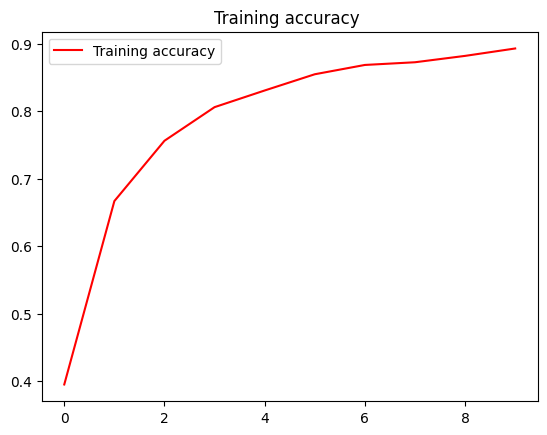

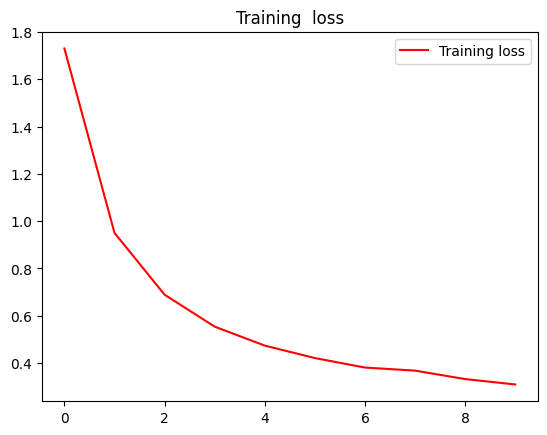

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_dir = "/content/tomatoleaf/tomato/train"



img_width, img_height = 150, 150
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')





model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(15, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,

)


acc = history.history['accuracy']
loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training accuracy ')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training  loss')
plt.legend()
plt.show()


In [ ]:

model.save("/content/saved_model.h5")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/tomatoleaf/tomato/test"

test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Accuracy:", test_accuracy)


Found 1161 images belonging to 15 classes.
36/36 [==============================] - 2s 46ms/step - loss: 1.0951 - accuracy: 0.7500
Test Accuracy: 0.75


1/1 [==============================] - 0s 399ms/step


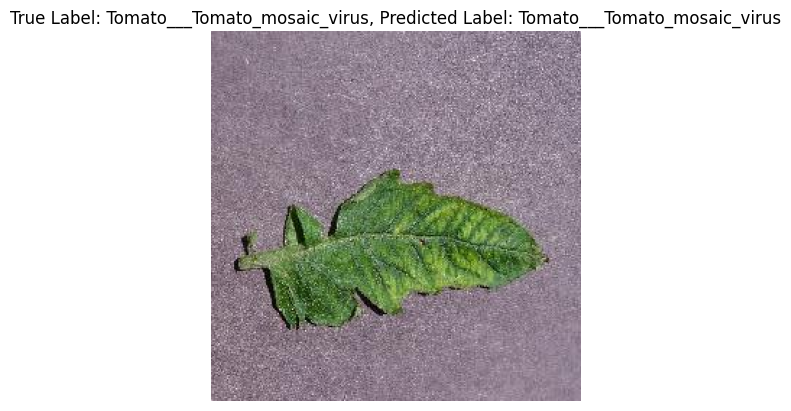

1/1 [==============================] - 0s 21ms/step


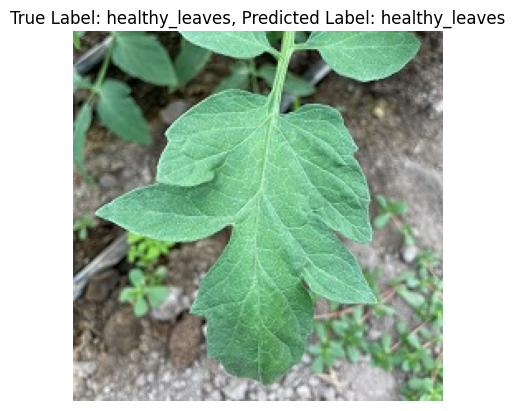

1/1 [==============================] - 0s 27ms/step


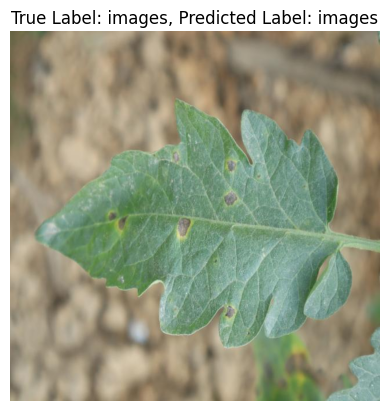

1/1 [==============================] - 0s 23ms/step


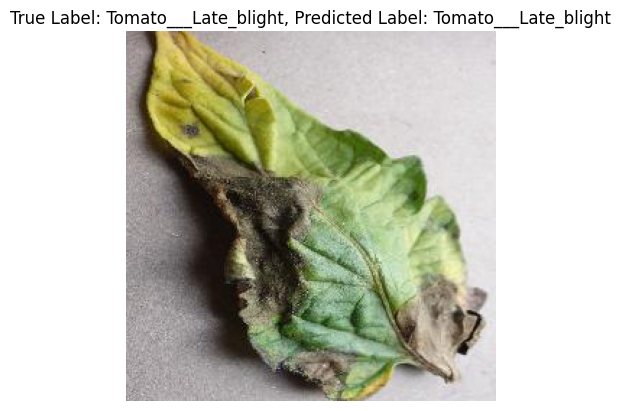

1/1 [==============================] - 0s 21ms/step


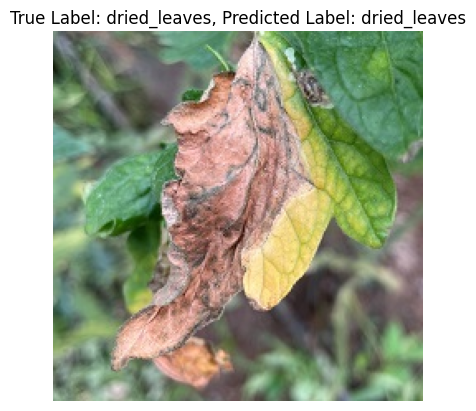

1/1 [==============================] - 0s 25ms/step


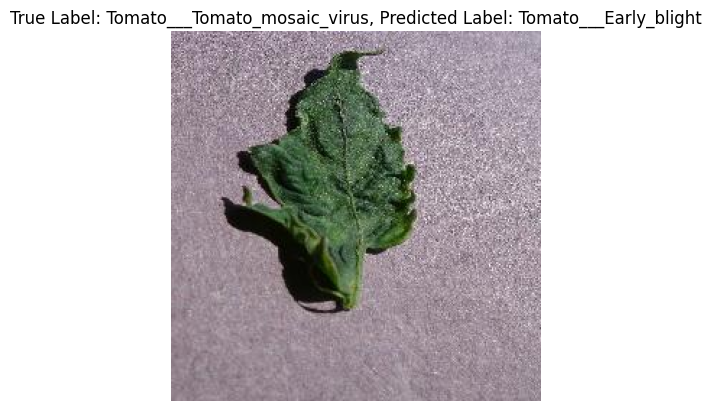

1/1 [==============================] - 0s 25ms/step


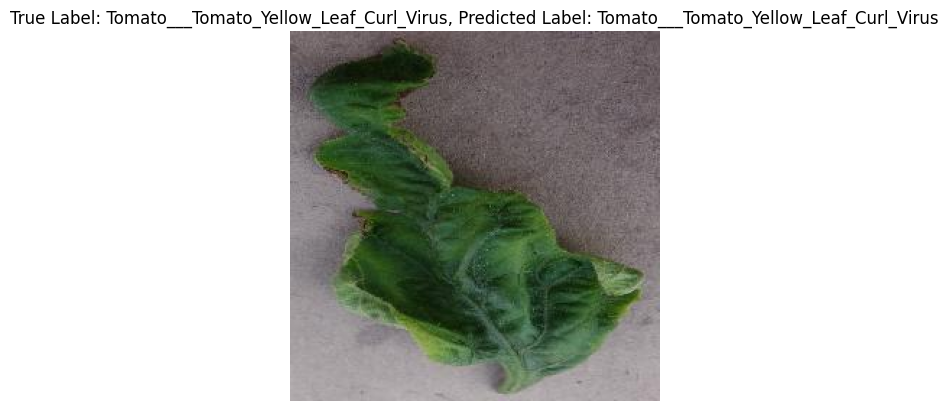

1/1 [==============================] - 0s 23ms/step


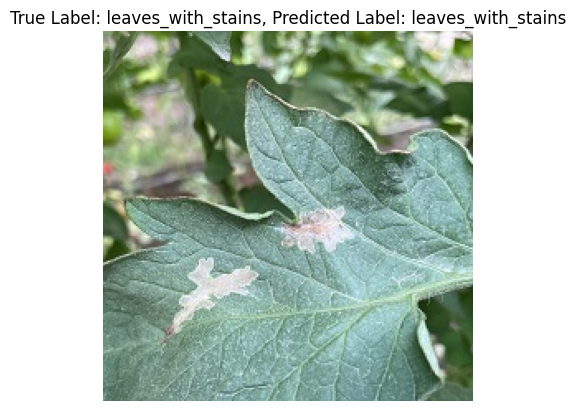

1/1 [==============================] - 0s 27ms/step


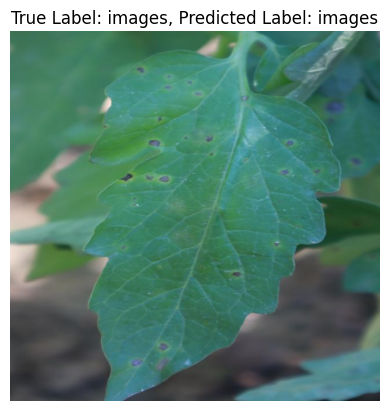

1/1 [==============================] - 0s 27ms/step


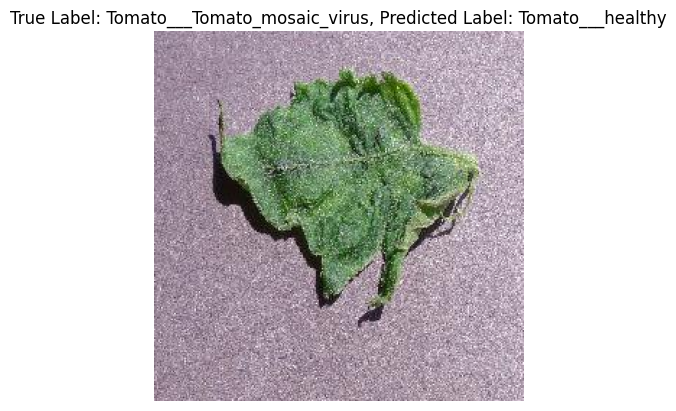

1/1 [==============================] - 0s 25ms/step


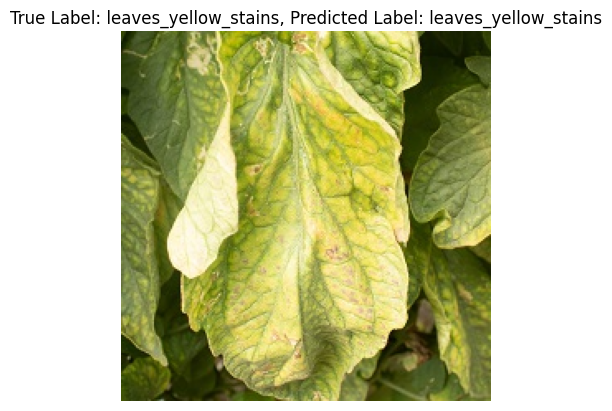

1/1 [==============================] - 0s 26ms/step


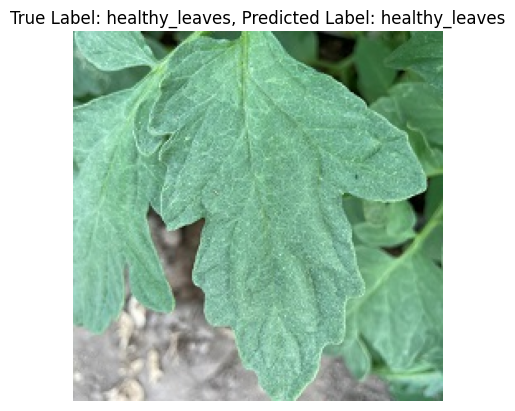

1/1 [==============================] - 0s 30ms/step


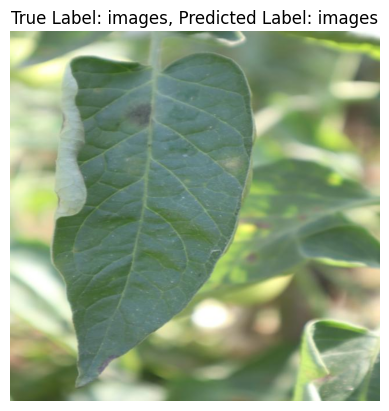

1/1 [==============================] - 0s 27ms/step


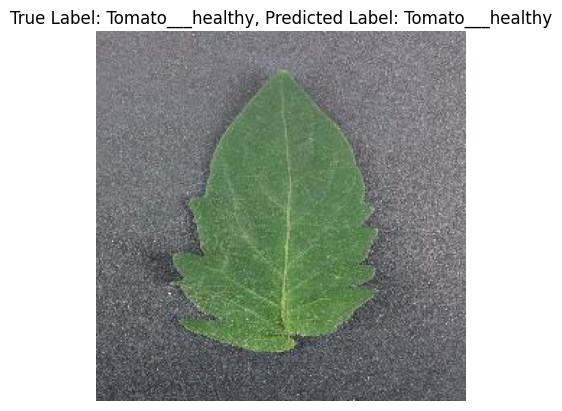

1/1 [==============================] - 0s 24ms/step


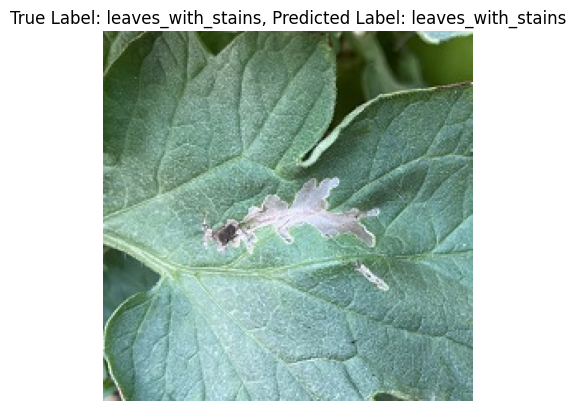

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import random


model = load_model("/content/saved_model.h5")


class_labels = sorted(os.listdir(train_dir))


test_dir = "/content/tomatoleaf/tomato/test"


def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array


random_images = []
for _ in range(15):
    class_label = random.choice(class_labels)
    class_dir = os.path.join(test_dir, class_label)
    img_name = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    random_images.append((img_path, class_label))


for img_path, true_label in random_images:
    img_array = preprocess_image(img_path)


    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]


    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_class_label}")
    plt.axis('off')
    plt.show()


In [ ]:
from google.colab import drive


drive.mount('/content/drive')



from google.colab import files


uploaded = files.upload()


Mounted at /content/drive


Saving tomato leaf.webp to tomato leaf.webp
Saving tomato-yellow-leaves-1.jpg.webp to tomato-yellow-leaves-1.jpg.webp


1/1 [==============================] - 0s 113ms/step


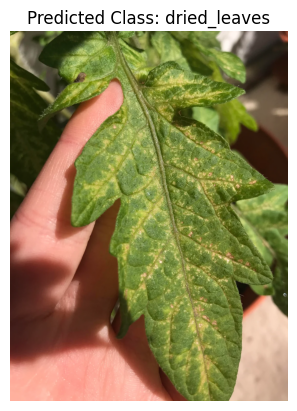

1/1 [==============================] - 0s 59ms/step


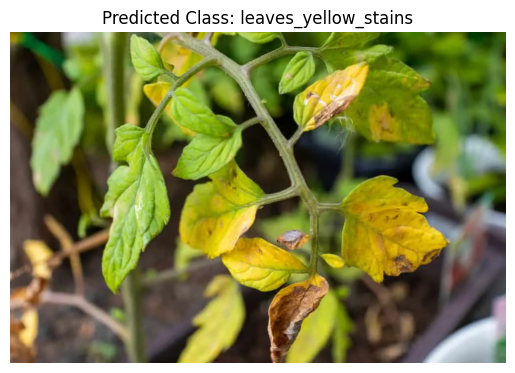

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os


model = load_model("/content/saved_model.h5")

class_labels = sorted(os.listdir(train_dir))


def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img_array


downloaded_images_dir = "/content/drive/MyDrive/tomatoes"


downloaded_images = []


for filename in os.listdir(downloaded_images_dir):
    img_path = os.path.join(downloaded_images_dir, filename)
    img_array = preprocess_image(img_path)


    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction)
    predicted_class_label = class_labels[predicted_class_idx]


    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Predicted Class: {predicted_class_label}")
    plt.axis('off')
    plt.show()
